In [346]:
import pandas as pd
import numpy as np
import json
from typing import List

In [347]:
# Load the german_credit dataset

df = pd.read_csv('../data/german_credit.csv')
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [348]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [349]:
column_mapping = {
    'Creditability': 'creditability',
    'Account Balance': 'account_balance',
    'Duration of Credit (month)': 'duration_of_credit_in_months',
    'Payment Status of Previous Credit': 'payment_status_of_previous_credit',
    'Purpose': 'purpose',
    'Credit Amount': 'credit_amount',
    'Value Savings/Stocks': 'savings_stocks',
    'Length of current employment': 'length_of_current_employment',
    'Instalment per cent': 'instalment_per_cent',
    'Sex & Marital Status': 'sex_marital_status',
    'Guarantors': 'guarantors',
    'Duration in Current address': 'duration_in_current_address',
    'Most valuable available asset': 'most_valuable_available_asset',
    'Age (years)': 'age_in_years',
    'Concurrent Credits': 'concurrent_credits',
    'Type of apartment': 'type_of_apartment',
    'No of Credits at this Bank': 'no_of_credits_at_this_bank',
    'Occupation': 'occupation',
    'No of dependents': 'no_of_dependents',
    'Telephone': 'telephone',
    'Foreign Worker': 'foreign_worker'
}


df.rename(columns=column_mapping, inplace=True)
df.columns

Index(['creditability', 'account_balance', 'duration_of_credit_in_months',
       'payment_status_of_previous_credit', 'purpose', 'credit_amount',
       'savings_stocks', 'length_of_current_employment', 'instalment_per_cent',
       'sex_marital_status', 'guarantors', 'duration_in_current_address',
       'most_valuable_available_asset', 'age_in_years', 'concurrent_credits',
       'type_of_apartment', 'no_of_credits_at_this_bank', 'occupation',
       'no_of_dependents', 'telephone', 'foreign_worker'],
      dtype='object')

In [350]:
df.head()

,creditability,account_balance,duration_of_credit_in_months,payment_status_of_previous_credit,purpose,credit_amount,savings_stocks,length_of_current_employment,instalment_per_cent,sex_marital_status,...,duration_in_current_address,most_valuable_available_asset,age_in_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### El conjunto de datos `german_credit.csv` contiene información sobre personas que solicitaron créditos bancarios en bancos alemanes en el año 1994. Contiene 20 variables:

- `creditability`: Variable binaria que indica si el solicitante devolvió el crédito (1) o no (0).

- `account_balance`: Variable que toma valores 1, 2, 3, o 4, indicando si el solicitante no tiene cuenta (1), tiene una cuenta poco balanceada (2) o bien balanceada (4).

- `duration_of_credit_in_months`: Duración del crédito en meses.

- `payment_status_of_previous_credit`: Variable que toma valores de 0 a 4, donde 0 indica que el solicitante no pagó y 4 indica que pagó todo en créditos previos.

- `purpose`: Variable que toma valores de 0 a 10, indicando el propósito del crédito solicitado. Por ejemplo, 0 puede representar la compra de un automóvil.

- `credit_amount`: Variable numérica que representa la cantidad de crédito solicitada.

- `savings_stocks`: Variable que representa el dinero ahorrado, con valores de 1 a 5, donde 1 significa "nada", 2 significa "≤100", 3 significa "(100,500]", y 4 significa "(500, 1000]".

- `length_of_current_employment`: Variable que toma valores de 1 a 5, representando el estado de empleo actual del solicitante, desde desempleado (1) hasta más de 7 años (5).

- `instalment_per_cent`: Variable que toma valores de 1 a 4, indicando el porcentaje de financiamiento del crédito, donde 1 representa más del 35%, 2 representa (25%, 35%), 3 representa [20%, 25%), y 4 representa menos del 20%.

- `sex_marital_status`: Variable que toma valores de 1 a 4, donde 1 representa "Male, Divorced", 2 representa "Male, Single", 3 representa "Male, Married/Widowed", y 4 representa "Female".

- `guarantors`: Variable que toma valores de 1 a 3, indicando la presencia de garantías, desde "Ninguno" hasta "garantía".

- `duration_in_current_address`: Variable que toma valores de 1 a 4, representando la duración en la dirección actual.

- `most_valuable_available_asset`: Variable que toma valores de 1 a 4, representando el activo más valioso disponible, desde "None" hasta "Real Estate".

- `age_in_years`: Variable numérica que representa la edad del solicitante.

- `concurrent_credits`: Variable que toma valores de 1 a 3, indicando la existencia de créditos concurrentes en otros bancos o entidades financieras.

- `type_of_apartment`: Variable que toma valores de 1 a 3, representando el tipo de vivienda, desde "Free" hasta "Owned".

- `no_of_credits_at_this_bank`: Variable que toma valores de 1 a 4, indicando la cantidad de créditos en este banco.

- `occupation`: Variable que toma valores de 1 a 4, representando la ocupación del solicitante, desde "Unemployed" hasta "Executive".

- `no_of_dependents`: Variable binaria que toma valores 1 o 2, indicando si el solicitante tiene más de 3 dependientes o menos de 3.

- `telephone`: Variable binaria que toma valores 1 o 2, representando si el solicitante tiene teléfono (sí o no).

- `foreign_worker`: Variable binaria que toma valores 1 o 2, indicando si el solicitante es un trabajador extranjero (sí o no).



### Transformar variables numericas a categoricas

#### Discretizar duration_of_credit_in_months

In [351]:
df.duration_of_credit_in_months.unique()

array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48, 36, 15, 42, 21, 27, 33, 28,
        4, 47, 14, 39, 60,  5, 22, 54, 13, 16,  7, 20, 26, 45, 72, 40],
      dtype=int64)

In [352]:
# Cada categoria representa un rango de meses.
# 1: 0 - 12
# 2: 12 - 24
# 3: 24 - 36
# 4: 36 - 48
# 5: 48 - 60
# 6: 60 - 72
# 7: 72 - inf
bins = [0, 12, 24, 36, 48, 60, 72, float('inf')] 
category_numbers = [1, 2, 3, 4, 5, 6, 7]
df['duration_of_credit_in_months'] = pd.cut(df['duration_of_credit_in_months'], bins=bins, labels=category_numbers)
df['duration_of_credit_in_months'] = df['duration_of_credit_in_months'].astype(int)

In [353]:
df.duration_of_credit_in_months.describe()

count    1000.000000
mean        1.975000
std         0.968149
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: duration_of_credit_in_months, dtype: float64

#### Discretizar credit_amount

In [354]:
df.credit_amount.describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: credit_amount, dtype: float64

In [355]:
# Dividir en 4 categorias
# 1: 0 - 2500
# 2: 2500 - 5000
# 3: 5000 - 7500
# 4: 7500 - inf
bins = [0, 2500, 5000, 7500, float('inf')]
category_numbers = [1, 2, 3, 4]
df['credit_amount'] = pd.cut(df['credit_amount'], bins=bins, labels=category_numbers)
df['credit_amount'] = df['credit_amount'].astype(int)

In [356]:
df.credit_amount.describe()

count    1000.000000
mean        1.737000
std         0.956423
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: credit_amount, dtype: float64

#### Discretizar age_in_years

In [357]:
df.age_in_years.describe()

count    1000.00000
mean       35.54200
std        11.35267
min        19.00000
25%        27.00000
50%        33.00000
75%        42.00000
max        75.00000
Name: age_in_years, dtype: float64

In [358]:
# Dividir en 4 categorias
# 1: 0 - 25
# 2: 25 - 50
# 3: 50 - 75
# 4: 75 - inf
bins = [0, 25, 50, 75, float('inf')]
category_numbers = [1, 2, 3, 4]
df['age_in_years'] = pd.cut(df['age_in_years'], bins=bins, labels=category_numbers)
df['age_in_years'] = df['age_in_years'].astype(int)

In [359]:
df.age_in_years.describe()

count    1000.000000
mean        1.923000
std         0.545315
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: age_in_years, dtype: float64

In [360]:
# Check column data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   creditability                      1000 non-null   int64
 1   account_balance                    1000 non-null   int64
 2   duration_of_credit_in_months       1000 non-null   int32
 3   payment_status_of_previous_credit  1000 non-null   int64
 4   purpose                            1000 non-null   int64
 5   credit_amount                      1000 non-null   int32
 6   savings_stocks                     1000 non-null   int64
 7   length_of_current_employment       1000 non-null   int64
 8   instalment_per_cent                1000 non-null   int64
 9   sex_marital_status                 1000 non-null   int64
 10  guarantors                         1000 non-null   int64
 11  duration_in_current_address        1000 non-null   int64
 12  most_valuable_availab

In [361]:
df.columns

Index(['creditability', 'account_balance', 'duration_of_credit_in_months',
       'payment_status_of_previous_credit', 'purpose', 'credit_amount',
       'savings_stocks', 'length_of_current_employment', 'instalment_per_cent',
       'sex_marital_status', 'guarantors', 'duration_in_current_address',
       'most_valuable_available_asset', 'age_in_years', 'concurrent_credits',
       'type_of_apartment', 'no_of_credits_at_this_bank', 'occupation',
       'no_of_dependents', 'telephone', 'foreign_worker'],
      dtype='object')

In [362]:
print(f"German Credit dataset with {len(df)} records and categorical columns:\n ")
columns = df.columns.tolist()
for col in columns:
    unique_values = df[col].unique()
    print(f"\t{col}: {[v for v in unique_values]}")

German Credit dataset with 1000 records and categorical columns:
 
	creditability: [1, 0]
	account_balance: [1, 2, 4, 3]
	duration_of_credit_in_months: [2, 1, 3, 4, 5, 6]
	payment_status_of_previous_credit: [4, 2, 3, 0, 1]
	purpose: [2, 0, 9, 3, 1, 10, 5, 4, 6, 8]
	credit_amount: [1, 2, 3, 4]
	savings_stocks: [1, 2, 3, 5, 4]
	length_of_current_employment: [2, 3, 4, 1, 5]
	instalment_per_cent: [4, 2, 3, 1]
	sex_marital_status: [2, 3, 4, 1]
	guarantors: [1, 3, 2]
	duration_in_current_address: [4, 2, 3, 1]
	most_valuable_available_asset: [2, 1, 3, 4]
	age_in_years: [1, 2, 3]
	concurrent_credits: [3, 1, 2]
	type_of_apartment: [1, 2, 3]
	no_of_credits_at_this_bank: [1, 2, 3, 4]
	occupation: [3, 2, 1, 4]
	no_of_dependents: [1, 2]
	telephone: [1, 2]
	foreign_worker: [1, 2]


# Ejercicio 1.a

In [363]:
# Dividir el conjunto de datos aleatoriamente en dos partes, el conjunto de entrenamiento y elconjunto de prueba, con un 80% de los datos para entrenamiento y un 20% para prueba.

def train_test_split(df, test_size=0.2, random_state=1234):
    train = df.sample(frac=1-test_size, random_state=random_state)
    test = df.drop(train.index)
    return train, test

train, test = train_test_split(df, test_size=0.2, random_state=1234)

In [364]:
X_train = train.drop(columns=['creditability'])
y_train = train['creditability']
X_test = test.drop(columns=['creditability'])
y_test = test['creditability']

In [365]:
X_train.head()

,account_balance,duration_of_credit_in_months,payment_status_of_previous_credit,purpose,credit_amount,savings_stocks,length_of_current_employment,instalment_per_cent,sex_marital_status,guarantors,duration_in_current_address,most_valuable_available_asset,age_in_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
681,2,1,2,3,1,1,5,3,4,3,3,1,2,1,2,2,2,1,1,1
990,1,2,2,6,1,1,1,4,2,1,1,1,2,3,2,1,1,1,1,1
155,4,2,4,3,2,1,3,4,3,1,2,1,2,3,2,2,2,1,1,1
768,2,1,1,0,1,2,4,2,3,1,3,4,2,3,2,1,3,1,1,1
438,1,3,4,9,1,1,5,4,3,1,4,3,2,2,2,4,4,2,2,1


In [366]:
y_train.head()

681    1
990    0
155    1
768    0
438    1
Name: creditability, dtype: int64

In [367]:
X_test.head()

,account_balance,duration_of_credit_in_months,payment_status_of_previous_credit,purpose,credit_amount,savings_stocks,length_of_current_employment,instalment_per_cent,sex_marital_status,guarantors,duration_in_current_address,most_valuable_available_asset,age_in_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
1,1,1,4,0,2,1,3,2,3,1,2,1,2,3,1,2,3,2,1,1
3,1,1,4,0,1,1,3,3,3,1,2,1,2,3,1,2,2,2,1,2
4,1,1,4,0,1,1,3,4,3,1,4,2,2,1,2,2,2,1,1,2
10,1,1,4,0,2,1,3,2,3,1,2,1,2,3,1,2,3,2,1,1
14,1,2,2,3,1,5,4,2,4,1,4,3,1,3,1,2,2,1,1,1


In [368]:
y_test.head()

1     1
3     1
4     1
10    1
14    1
Name: creditability, dtype: int64

# Ejercicio 1.b

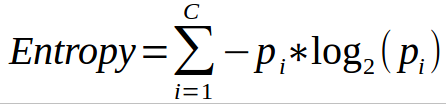
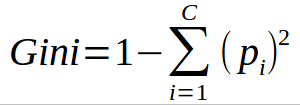

## Iterative Dichotomiser 3 (ID3)

### Funciones auxiliares

In [369]:
def entropy(array: pd.Series):
    """Calculate the shannon entropy of an array of objects.

    Args:
        array: A pandas series of categorical values.

    Returns:
        entropy: The shannon entropy of the array.
    """
    class_probabilities = array.value_counts() / len(array)
    entropy_value = -np.sum(class_probabilities * np.log2(class_probabilities))
    return entropy_value

In [370]:
def information_gain(X: pd.DataFrame, y: pd.Series, attribute: str):
    """Gets the information gain of a given attribute.

    Args:
        X: The feature matrix (2D) of the dataset.
        y: The target vector (1D) of the dataset. Also known as class labels, or dependent variable.
        attribute: The attribute to calculate the information gain for.

    Returns:
        information_gain: The information gain of the attribute.
    """
    entropy_before_split = entropy(y)
    values = X[attribute].unique()
    entropy_after_split = 0

    for value in values:
        subset = y[X[attribute] == value]
        entropy_after_split += (len(subset) / len(y)) * entropy(subset)

    information_gain_value = entropy_before_split - entropy_after_split
    return information_gain_value

### Armado del arbol de decision mediante el algoritmo id3

In [371]:
def id3(X_train: pd.DataFrame, y_train: pd.Series, attributes: List) -> dict:
    """Builds a decision tree using the ID3 algorithm.

    Args:
        X_train: The feature matrix (2D) of the dataset.
        y_train: The target vector (1D) of the dataset. Also known as class labels, or dependent variable.
        attributes: The list of attributes to split on.

    Returns:
        tree: The decision tree in a nested dictionary representation.
    """
    # If all data points belong to the same class, return a leaf node with that class
    if len(y_train.unique()) == 1:
        return str(y_train.iloc[0])

    # If there are no more attributes to split on, return the majority class
    majority_class = y_train.mode().iloc[0]
    if len(attributes) == 0:
        return str(majority_class)

    # Calculate information gain for each attribute
    information_gains = {attribute: information_gain(X_train, y_train, attribute) for attribute in attributes}

    # Choose the attribute with the highest information gain
    best_attribute = max(information_gains, key=information_gains.get)

    # Create a decision tree node with the best attribute
    # Default value when classifying will be the majority class
    tree = {str(best_attribute): {"default": int(majority_class)}}

    # Remove the chosen attribute from the list of attributes
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    # Recursively build the tree for each value of the best attribute
    for value in X_train[best_attribute].unique():
        subset = X_train[X_train[best_attribute] == value]
        subtarget = y_train[subset.index]
        subtree = id3(X_train=subset, y_train=subtarget, attributes=remaining_attributes)
        tree[str(best_attribute)][str(value)] = subtree

    return tree


In [372]:
# Build the decision tree
decision_tree = id3(X_train, y_train, attributes=X_train.columns.tolist())

In [373]:
# Pretty print the decision tree
print(json.dumps(decision_tree, indent=4))

{
    "account_balance": {
        "default": 1,
        "2": {
            "duration_of_credit_in_months": {
                "default": 1,
                "1": {
                    "purpose": {
                        "default": 1,
                        "3": {
                            "length_of_current_employment": {
                                "default": 1,
                                "5": "1",
                                "2": {
                                    "age_in_years": {
                                        "default": 1,
                                        "2": "1",
                                        "1": "0"
                                    }
                                },
                                "3": {
                                    "savings_stocks": {
                                        "default": 1,
                                        "1": "1",
                                        "3": {
                    

In [374]:
def classify(tree: dict, sample: pd.DataFrame) -> str:
    """Classifies a sample using a given decision tree.

    Args:
        tree: The decision tree in a nested dictionary representation.
        sample: The sample to classify.

    Returns:
        y_hat: The predicted class label.
    """

    if not isinstance(tree, dict):
        return tree
    
    attribute = next(iter(tree))
    sample_value = sample[attribute]
    
    # Recursively classify the sample if the attribute value is in the tree
    if sample_value in tree[attribute]:
        return classify(tree[attribute][sample_value], sample)
    
    # If the attribute value is not in the tree, return the majority class
    return tree[attribute]["default"]

In [375]:
def evaluate_tree(tree: dict, X_test: pd.DataFrame, y_test: pd.Series) -> float:
    """Evaluates the accuracy of a given decision tree on a dataset.

    Args:
        tree: The decision tree in a nested dictionary representation.
        X_test: The feature matrix (2D) of the dataset.
        y_test: The target vector (1D) of the dataset.

    Returns:
        accuracy: The accuracy of the decision tree on the dataset.
    """
    y_hats = [classify(tree, row) for _, row in X_test.iterrows()]
    correct_predictions = sum(1 for y_hat, y in zip(y_hats, y_test) if y_hat == y)

    # y_hats = []
    # for _, row in X_test.iterrows():
    #     print(f"[evaluate_tree: {_}] \n {row} \n ========================")
    #     y_hat = classify(tree, row)
    #     y_hats.append(y_hat)

    # correct_predictions = 0
    # for y_hat, y in zip(y_hats, y_test):
    #     if y_hat == y:
    #         correct_predictions += 1   
    
    return correct_predictions / len(X_test)

In [376]:
# Evaluate the pruned decision tree on the validation data
accuracy_before_pruning = evaluate_tree(decision_tree, X_test, y_test)
print(f"Accuracy before pruning: {accuracy_before_pruning:.2%}")

Accuracy before pruning: 69.00%


In [377]:
    
# # Evaluate the pruned decision tree on the validation data
# accuracy_after_pruning = evaluate_tree(pruned_tree, X_test, X_test)
# print(f"Accuracy after pruning: {accuracy_after_pruning:.2%}")

# Ejercicio 1.c

In [378]:
# Specify the number of bootstrap samples you want to generate
nbags = 3

# Get the length of your training dataset
training_size = len(X_train)

# Create empty lists to store the bootstrap samples
bags_X = []
bags_y = []

# Perform a loop to generate the bootstrap samples
for _ in range(nbags):
    # Generate random indices with replacement
    idx = np.random.choice(training_size, size=training_size, replace=True)
    print(idx)
    break
    
    # Create the bootstrap samples using the indices
    bag_X = X_train[idx]
    bag_y = y_train[idx]
    
    # Store the bootstrap samples in the corresponding lists
    bags_X.append(bag_X)
    bags_y.append(bag_y)

[784 458 684 545 326 243 399 168 159 458 555 700 257 462 626 363 606 437
 317 411 763 499 535 616 245  30 197 343  95 410 703 211 345 137 231 639
  82 652 279  85 573 716 500 584 571 475 274 437 398 728 720 572 531  54
 540 226 503  88 425  50 396 497 626 233 435 739 689 102 633 456  23  43
 384  57 412 674 620 417 522 157 512 514 112 453 524 108 476  43 205 246
 232  79 372 455 275 559  50 150 198 669 224 681 351 161  80 783 355 405
 214 493 152 502 282  50 523 258 246 795  22 439 647 313 334 560 583 677
 552 460 409 660 455 707 704 536 580 651 778 679 114 728 161 422 480 274
 243 228 630 355 686 302 675 506 769  83 673 378 688 759  27 169  58  47
 620 311 792  34  46 327 253 386 216 491 325 574 273 704 722 646 594 779
 139 430 213 177 257 490 590 392 296 444 482 119 363 622  37 330 566 125
 105 534 706 679 251  80 470 680 430  78 658  43 511 734  54 600 129  77
 465 379 176  98  80 695 431 533 621 493 266 620 762 273  88 416 535 545
 544 286 724 707 136 561 224 675 778 115 115  21 59

# Ejercicio 1.d

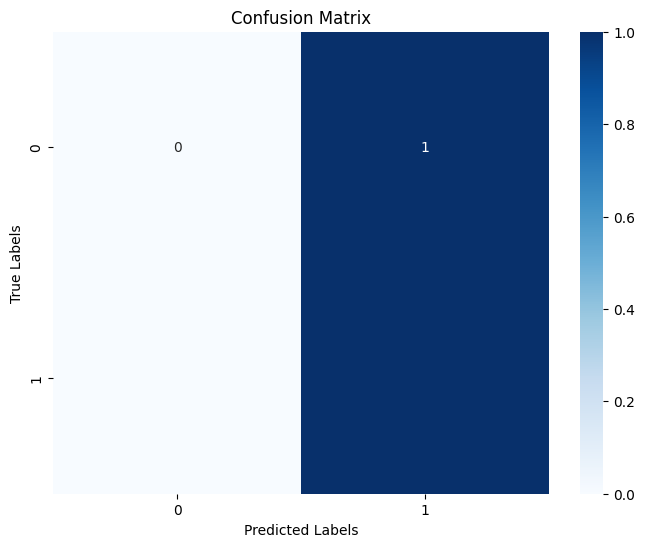

In [379]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del árbol de decisión en el conjunto de prueba
predictions = [classify(decision_tree, row) for _, row in X_test.iterrows()]

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions, normalize='true')

# Crear un DataFrame de Pandas a partir de la matriz de confusión
confusion_df = pd.DataFrame(cm)

# Graficar la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Ejercicio 1.e

In [380]:
def prune_tree(tree: dict, X_train: pd.DataFrame, y_train: pd.Series) -> dict:
    """Prunes a given decision tree using Reduced Error Pruning (REP).

    Args:
        tree: The decision tree in a nested dictionary representation.
        X_train: The feature matrix (2D) of the dataset.
        y_train: The target vector (1D) of the dataset.

    Returns:
        subtree: The pruned subtree.
    """
    if not isinstance(tree, dict):
        return tree
    
    # Recursively prune subtrees
    for _, subtree in tree.items():
        for value, subsubtree in subtree.items():
            subtree[value] = prune_tree(subsubtree, X_train, y_train)
    
    # Calculate accuracy before pruning
    accuracy_before = evaluate_tree(tree, X_train, y_train)
    
    # Calculate accuracy after pruning (replace subtree with majority class)
    majority_class = y_train.mode().iloc[0]
    subtree_error = sum(evaluate_tree(subtree, X_train, y_train) for subtree in tree.values() if isinstance(subtree, dict))
    
    if subtree_error >= accuracy_before or majority_class is None:
        return majority_class
    
    return subtree